# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

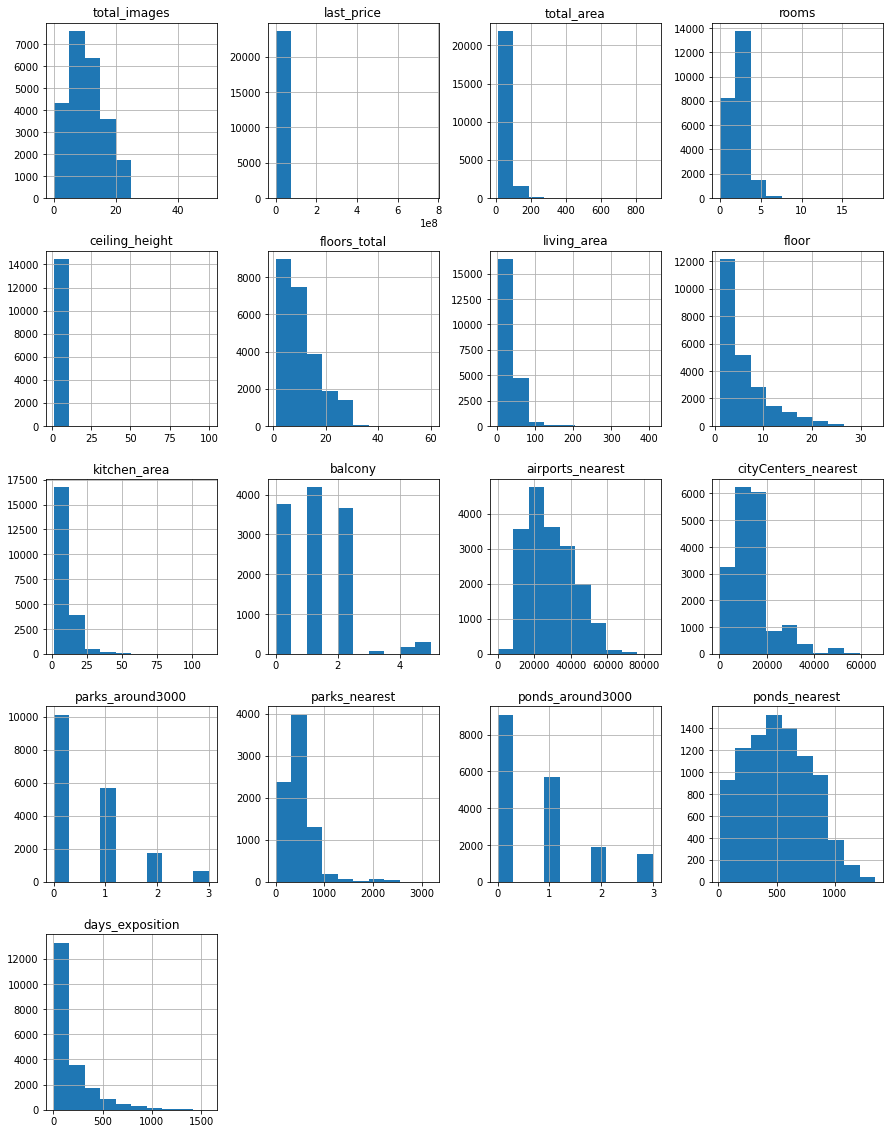

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t',decimal='.')

display(data.head())
data.info()

data.hist(figsize=(15, 20));

22 столбца: total_images - кол-во фотографий объекта, 
            last_price - последняя цена
            total_area - площадь квартиры
            first_day_exposition - дата публикации объявления
            rooms - кол-во комнат
            ceiling_height - высота потолка
            floors_total - всего этажей в доме
            living_area - жилая площадь
            floor - этаж
            is_apartment - апарты или квартира
            studio - квартира\студия
            open_plan - свободная планировка
            kitchen_area - площадь кухни 
            balcony - количество балконов
            locality_name - название населенного пункта
            airports_nearest - расстояние до блитжайшего аэропорта
            cityCenters_nearest - расстояние до центра города
            parks_around3000 - число парков в пределах 3000 м 
            parks_nearest - расстояние до ближайшего парка
            ponds_around3000 - число водоемов в пределах 3000 м
            ponds_nearest - расстояние до ближайшего водоема
            days_exposition - сколько дней опубликовано объявление
            
Строк 23699. 
            есть строки с пропущенными данными:
            5   ceiling_height        14504 non-null  float64
            6   floors_total          23613 non-null  float64
            7   living_area           21796 non-null  float64
            9   is_apartment          2775 non-null   object 
            12  kitchen_area          21421 non-null  float64
            13  balcony               12180 non-null  float64
            14  locality_name         23650 non-null  object 
            15  airports_nearest      18157 non-null  float64
            16  cityCenters_nearest   18180 non-null  float64
            17  parks_around3000      18181 non-null  float64
            18  parks_nearest         8079 non-null   float64
            19  ponds_around3000      18181 non-null  float64
            20  ponds_nearest         9110 non-null   float64
            21  days_exposition       20518 non-null  float64
            
есть строки с неправильным типом данных, которые надо поменять
first_day_exposition — дата публикации object - date
floors_total - всего этажей в доме -  float64 - int
is_apartment - апартаменты\квартира - object  - bool  
balcony - количество балконов - float64 - int
parks_around3000, ponds_around3000 - число парков/водоемов в пределах 3000 м- float64 - int
days_exposition - сколько дней опубликовано объявление - float64 - int


            


### Предобработка данных

In [3]:
# функция, получающая на вход название столбца, и возвращающая число пропущенных значений
def print_null(column):
    return print('Пропущено {:.1%}'. format(data[column].isna().value_counts()[1] / len(data), 2), column)
print_null('locality_name')
data.dropna(subset=['locality_name'],inplace=True)
#Удаляем пропуски в locality_name - название населенного пункта/их всего 49 штук, т.е. 0.2% от данных.


Пропущено 0.2% locality_name


Удалили пропуски в locality_name - название населенного пункта/их всего 49 штук, т.е. 0.2% от данных.

In [4]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y.%m.%dT%H:%M:%S')
#переводим в формат даты

перевели first_day_exposition в формат даты

In [5]:
#print(data['locality_name'].unique()) 

duplicates = ['посёлок', 'поселок городского типа', 'городской посёлок', 'посёлок городского типа', 'городской поселок', 'коттеджный посёлок', 'коттеджный поселок']
name = 'поселок' # правильное имя
data['locality_name'] = data['locality_name'].astype(str)
def replace_wrong_values(wrong_values, correct_value):
    for wrong_value in wrong_values: # перебираем неправильные имена
        data['locality_name'] = data['locality_name'].apply(lambda x: x.replace(wrong_value, correct_value))

replace_wrong_values(duplicates, name)
#print(data['locality_name'].unique()) 

поменяли названия: посёлок, поселок городского типа, городской посёлок, посёлок городского типа, городской поселок, коттеджный посёлок, коттеджный поселок - поселок

In [6]:
#обработаем число балконов. предположим, что если пропущено значение, то значит нет балкона
print_null('balcony') #48.7% пропусков, нельзя игнорировать, заменим на 0
data['balcony'].fillna(0, inplace=True)
data['balcony'] = data['balcony'].astype(int)

Пропущено 48.7% balcony


обработаем число балконов. предположим, что если пропущено значение, то значит нет балкона и приведем число балконов к целому 

In [7]:
#обработаем пропуски в общей этажности домов
print_null('floors_total') # 0.4% пропусков. удалим эти строки
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype(int)

Пропущено 0.4% floors_total


обработаем пропуски в общей этажности домов и приведем этажность к целому типу

In [8]:

print_null('parks_around3000')
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)

Пропущено 23.3% parks_around3000


Приводим в целочисленный тип количество парков. Заменяем пропущенные значения на 0 
берем гипотезу, что если пропущено, значит нет.

In [9]:

print_null('ponds_around3000')
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)

Пропущено 23.3% ponds_around3000


Приводим в целочисленный тип количество водоемов. Заменяем пропущенные значения на 0
берем гипотезу, что если пропущено, значит нет.

In [10]:
print_null('ceiling_height')

median_height=data.groupby('floors_total')['ceiling_height'].transform('median')
data['ceiling_height'].fillna(median_height,inplace=True)

median_height=data.groupby('locality_name')['ceiling_height'].transform('median')
data['ceiling_height'].fillna(median_height,inplace=True)

Пропущено 38.5% ceiling_height


заменим на медианную высоту потолка для домов такой же этажности, затем, оставшиеся пропуски заполним медианой по населенному пункту.

In [11]:
print_null('is_apartment')
data['is_apartment']=data['is_apartment'].fillna(False) 

Пропущено 88.3% is_apartment


если пропущено значение в is_apartment, значит точно не апартамент, а квартира.

In [12]:
print_null('living_area')
k_living = data['living_area'].median() / data['total_area'].median()
data['living_area'].fillna(k_living * data['total_area'], inplace=True)

Пропущено 7.9% living_area


Заменяем пустые значения жилой площади, используя коэффициент: отношение медианы жилой площади к медиане общей площади.

In [13]:
# Заменяем пустые значения площади кухни
print_null('kitchen_area')
k_kitchen = data['kitchen_area'].median() / data['total_area'].median()
data['kitchen_area'].fillna(k_kitchen * data['total_area'], inplace=True)

Пропущено 9.4% kitchen_area


Заменяем пустые значения площади кухни, используя коэффициент: отношение медианы площади кухни к медиане общей площади.

In [14]:
display(data['rooms'].value_counts())
display(data.query('is_apartment == False')['rooms'].describe())

apart = data.pivot_table(index='is_apartment',values='rooms',aggfunc=('count','median'))
apart.sort_values(by='count',ascending=False)

1     8004
2     7897
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

count    23515.000000
mean         2.070636
std          1.078324
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

,count,median
is_apartment,,
False,23515,2
True,50,2


Есть значение - 0 комнат. Избавимся от этого парадокса.

In [15]:
display(data.query('rooms == 0')['total_area'].describe())
for room in range(1,19):
    print(f'{room} комнатная квартира:',data.query('rooms == @room')['total_area'].describe())


count    194.000000
mean      29.321701
std       26.051030
min       15.500000
25%       24.062500
50%       26.075000
75%       28.375000
max      371.000000
Name: total_area, dtype: float64

1 комнатная квартира: count    8004.000000
mean       37.636569
std         9.212029
min        12.000000
25%        32.500000
50%        36.600000
75%        41.000000
max       494.100000
Name: total_area, dtype: float64
2 комнатная квартира: count    7897.000000
mean       55.821274
std        13.191905
min        20.000000
25%        46.000000
50%        53.000000
75%        62.000000
max       196.000000
Name: total_area, dtype: float64
3 комнатная квартира: count    5779.000000
mean       77.706740
std        23.266035
min        40.100000
25%        62.000000
50%        72.800000
75%        86.800000
max       363.100000
Name: total_area, dtype: float64
4 комнатная квартира: count    1172.000000
mean      107.521459
std        44.336448
min        42.000000
25%        77.775000
50%        99.300000
75%       125.325000
max       500.000000
Name: total_area, dtype: float64
5 комнатная квартира: count    325.000000
mean     161.517200
std       69.416385
min       40.000000
25%   

квартиру 371 кв.м. без определенного количества комнат уберем. 1 объект на статистику не повлияет, а определить количество комнат при таком метраже невозможно

In [16]:
data.drop(data.loc[(data['rooms']==0) & (data['total_area']==371)].index,inplace=True, axis=0)
data.reset_index(inplace=True, drop=True)
display(data.query('rooms == 0')['total_area'].describe())


count    193.000000
mean      27.551347
std        8.426054
min       15.500000
25%       24.050000
50%       26.050000
75%       28.300000
max       98.400000
Name: total_area, dtype: float64

75% квартир с 0 комнат имеют площадь менее 28.375 кв.м.
при этом площадь большинства 1-комнатных квартир от 32 до 41кв.м
2-комнатых от 46 до 62 кв.м
3-комнатных от 62 до 86 кв.м.
4-комнатных от 77.78 до 125 кв.м.
5-комнатных от 117 до 174
при этом с 0 комнат максимум 98.4 осталось
тогда заполним 0 по такому правилу:
1 - комната, если общая площадь квартиры до 46 кв.м
2- комнаты, если общая площадь от 46 до 62 кв.м
3-комнатные, если общая площадь от 62 до 78 кв.м
4- комнатные больше 78 кв.м.

In [17]:
data.loc[(data['rooms']==0) & (data['total_area']<46), 'rooms'] = 1
data.loc[(data['rooms']==0) & (data['total_area']>=46) & (data['total_area']<62), 'rooms'] = 2
data.loc[(data['rooms']==0) & (data['total_area']>=62) & (data['total_area']<78), 'rooms'] = 3
data.loc[(data['rooms']==0) & (data['total_area']>=78), 'rooms'] = 4

Проверим данные в других важных столбцах, начнем с цены за объект

count    2.356400e+04
mean     6.537323e+06
std      1.090308e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

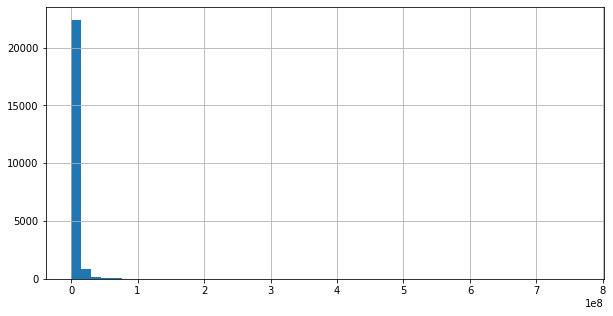

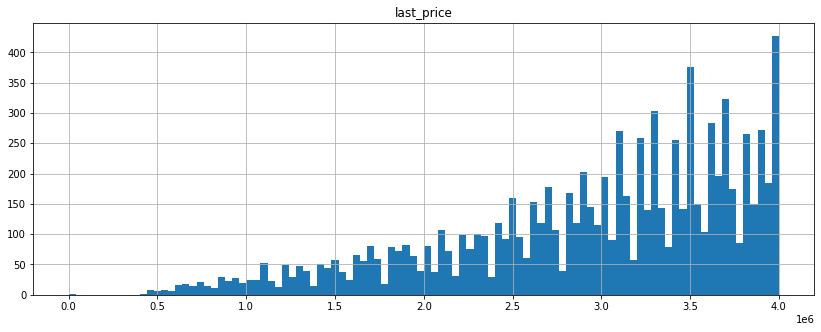

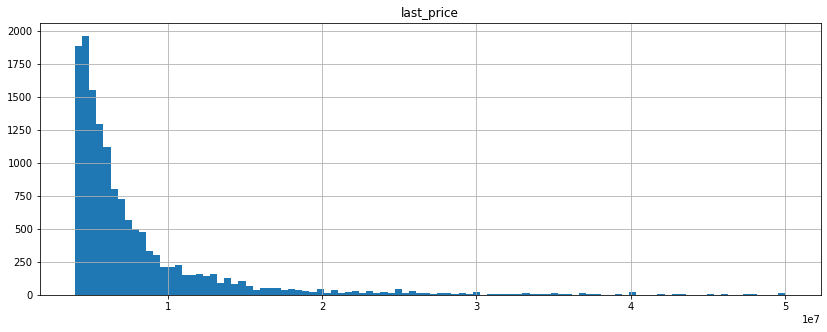

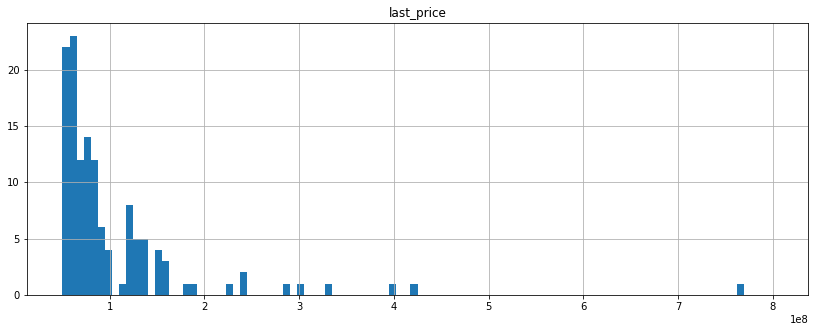

In [18]:
display(data['last_price'].describe())
data['last_price'].hist(figsize=(10,5), bins=50);
data.hist('last_price', bins=100, figsize=(14,5), range=(0, 4000000));
data.hist('last_price', bins=100, figsize=(14,5), range=(4000001, 50000000));
data.hist('last_price', bins=100, figsize=(14,5), range=(50000001, 800000000));

Минимальная цена 12 190 руб. это явно ошибка, уберем значения менее 300 тысяч.
есть и очень большие 763 млн рублей. но в Санкт-Петербурге вполне могут быть объекты с такой стоимостью.

In [19]:
data.drop(data.loc[(data['last_price']<300000)].index,inplace=True, axis=0)
data.reset_index(inplace=True, drop=True)

count    23563.000000
mean         2.735703
std          0.997026
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

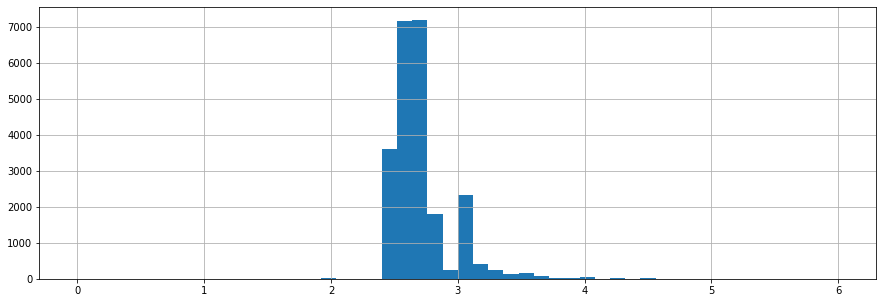

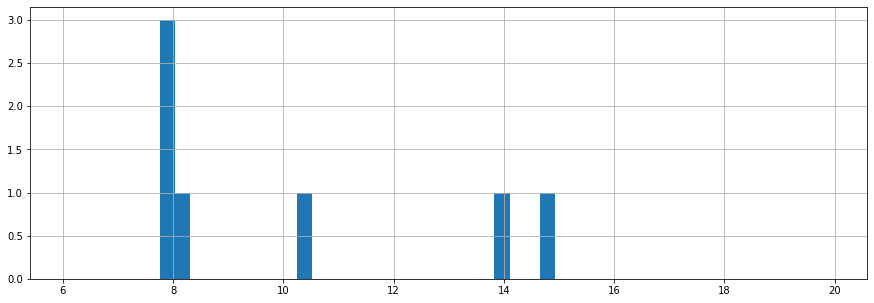

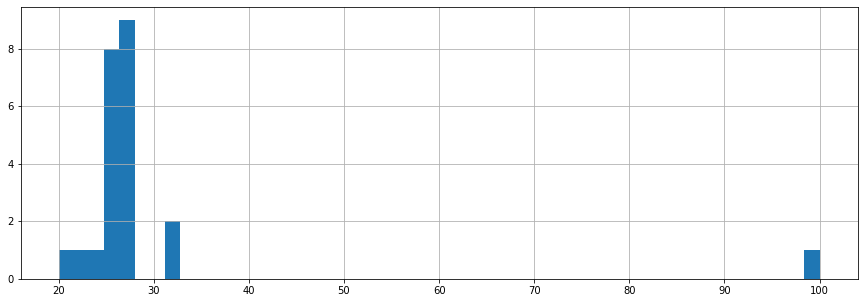

In [20]:
display(data['ceiling_height'].describe())
data['ceiling_height'].hist(figsize=(15,5), bins=50, range=(0,6));
plt.show()
data['ceiling_height'].hist(figsize=(15,5), bins=50, range=(6.1,19.9));
plt.show()
data['ceiling_height'].hist(figsize=(15,5), bins=50, range=(20,100));
plt.show()

Минимально потолок 1 м - это явно ошибка, но не понятно какого происхождения(опечатка, неправильный ввод и т.п.). Только игнорировать такие данные.
Обычные потолки в диапозоне от 2.5 до 3.5 м, но в двухуровненвых квартирах они могут быть и до 6 м. 
Потолков от 6 до 20 м не очень много - это явные ошибки, уберем их.
потолки с двузначным значением - возьмем гипотезу, что это ошибка ввода - пропустили запятую. разделим эти значения на 10. 
кроме потолка в 100м - просто уберем его.
Менее 2 м - это тоже не похоже на квартиры, удалим квартиры с потолками менее 1.9 м



In [21]:
data = data.drop(data[(data['ceiling_height'] == 100)].index)
data.loc[(data['ceiling_height']>10) & (data['ceiling_height']<100), 'ceiling_height'] = data['ceiling_height']/10
data = data.drop(data[(data['ceiling_height'] < 1.9)].index)
data = data.drop(data[(data['ceiling_height'] < 20) & (data['ceiling_height'] > 6)].index)

display(data['ceiling_height'].describe())
print(23552/23699)

count    23552.000000
mean         2.707557
std          0.235076
min          2.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          6.000000
Name: ceiling_height, dtype: float64

0.9937972066331913


Убрали строк менее 1 %. 
продолжаем. Посмотрим на общую площадь

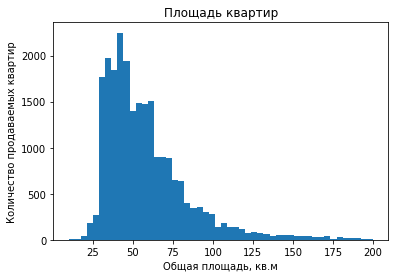

count    23552.000000
mean        60.313908
std         35.605884
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [22]:
plt.hist(data['total_area'], bins=50, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Количество продаваемых квартир')
plt.show()
display(data['total_area'].describe())

Вполне себе адекватные значения. с минимальной квартирой от 12 кв.м до максимальной 900 кв.м. Гистограмма показывает, что распределение очень похоже на жизненные ситуации, когда большинство квартир сосредоточено в диапозоне от 30 до 70 кв.м, с присутствием эксклюзивных вариантов.

проверим есть ли значения, когда общая площадь меньше жилой или кухня больше общей площади.

In [23]:
display(data.query('total_area < living_area')) 
display(data.query('total_area < kitchen_area')) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Таких аномалий нет.

In [24]:
# обработаем время публикации объявлений, почти 13,5% пропусков. скорее всего это просто не проданные квартиры и еще не сняты с публикации
print_null('days_exposition')
# средним значением по району или по кол-ву комнат не вижу смысла заменять, так как на срок продажи влияет слишком много факторов и в сумме все эти факторы
# поставим маркер 9999. так как для анализа других показателей(типа, ср.цена кв.м) 13,5% данных это существенно.
# и поменяем на целый тип
data['days_exposition'] = data['days_exposition'].fillna(9999).astype(int)

#data.isnull().sum()
data.info()

Пропущено 13.5% days_exposition
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23552 entries, 0 to 23562
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23552 non-null  int64         
 1   last_price            23552 non-null  float64       
 2   total_area            23552 non-null  float64       
 3   first_day_exposition  23552 non-null  datetime64[ns]
 4   rooms                 23552 non-null  int64         
 5   ceiling_height        23552 non-null  float64       
 6   floors_total          23552 non-null  int64         
 7   living_area           23552 non-null  float64       
 8   floor                 23552 non-null  int64         
 9   is_apartment          23552 non-null  bool          
 10  studio                23552 non-null  bool          
 11  open_plan             23552 non-null  bool          
 12  kitchen_area          23552 non-null  floa

Обработаем время публикации объявлений, почти 13,5% пропусков. скорее всего это просто не проданные квартиры и еще не сняты с публикации. 
Средним значением по району или по кол-ву комнат не вижу смысла заменять, так как на срок продажи влияет слишком много факторов,ну и в сумме все эти факторы влияют.
**Поставим маркер 9999. так как для анализа других показателей(типа, ср.цена кв.м) 13,5% данных это существенно.**
и поменяем на целый тип

### Посчитайте и добавьте в таблицу новые столбцы

In [27]:
# цена одного квадратного метра
data['price_m'] = data['last_price']/data['total_area']

In [28]:
# день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
data['weekday'] = data['first_day_exposition'].dt.weekday

In [29]:
# месяц публикации объявления;
data['month'] = data['first_day_exposition'].dt.month

In [30]:
# год публикации объявления;
data['year'] = data['first_day_exposition'].dt.year

In [31]:
# тип этажа квартиры (значения — «‎первый», «последний», «другой»);

data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data.loc[data['floor_category'].isna(), 'floor_category'] = 'другой'

In [32]:
# расстояние до центра города в километрах (переведите из м в км и округлим до целых значений).
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype(int, errors='ignore')
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16    51.000000      8         False  ...   
1            2.75            11    18.600000      1         False  ...   
2            2.55             5    34.300000      4         False  ...   
3            2.60            14    91.730769      9         False  ...   
4            3.03            14    32.000000     13         False  ...   

   parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0          482.0                 2          755.0         

### Проведите исследовательский анализ данных

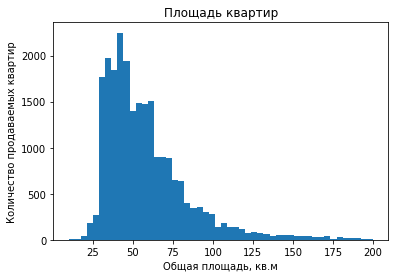

'максимальная Площадь квартиры'

900.0

'наименьшая Площадь квартиры'

12.0

'средняя Площадь квартир'

52.0

In [33]:
# Работаем с общей площадью
plt.hist(data['total_area'], bins=50, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Количество продаваемых квартир')
plt.show()
display('максимальная Площадь квартиры', data['total_area'].max(), 'наименьшая Площадь квартиры', data['total_area'].min(), 'средняя Площадь квартир', data['total_area'].median())

больше всего продается небольших квартир от 30 до 50 кв.м. Максимальная площадь квартиры - 900.0 кв.м, наименьшая площадь квартиры 12.0 кв.м, средняя площадь квартир 52.0 кв.м. Современная жизнь ведет к появлению микро-квартир в крупных городах.


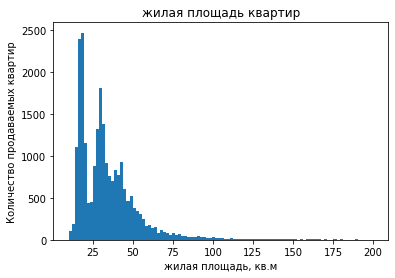

максимальная жилая площадь 409.7 наименьшая жилая площадь 2.0 средняя жилая площадь 30.0


In [34]:
# Работаем с жилая площадью
plt.hist(data['living_area'], bins=100, range=(10,200))
plt.title('жилая площадь квартир')
plt.xlabel('жилая площадь, кв.м')
plt.ylabel('Количество продаваемых квартир')
plt.show()
print('максимальная жилая площадь', data['living_area'].max(), 'наименьшая жилая площадь', data['living_area'].min(), 'средняя жилая площадь', data['living_area'].median())

всплески на графике, по всей видимости, соответствуют типу квартир по количеству комнат. 
большая часть квартир - это квартиры с жилой площадью от 15 до 20 кв.м. и от 26 до 30 кв.м
максимальная жилая площадь 409.7 кв.м, наименьшая жилая площадь 2.0 кв.м, средняя жилая площадь 30.0 кв.м. Надеюсь, что 2 кв.м жилой площади это ошибка, а не существующая квартира.

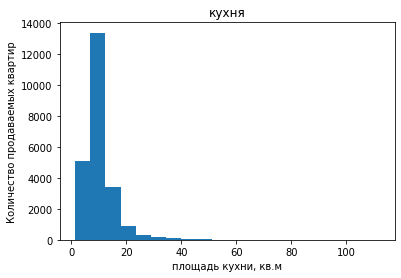

наибольшая кухня 112.0 наименьшая кухня 1.3 средняя кухня 9.0


In [35]:
# Работаем с площадью кухни
plt.hist(data['kitchen_area'], bins=20)
plt.title('кухня')
plt.xlabel('площадь кухни, кв.м')
plt.ylabel('Количество продаваемых квартир')
plt.show()

print('наибольшая кухня', data['kitchen_area'].max(), 'наименьшая кухня', data['kitchen_area'].min(), 'средняя кухня', data['kitchen_area'].median())

больше всего продается квартир с кухнями от 8 до 15 кв.м. Наибольшая кухня 112.0, наименьшая кухня 1.3, средняя кухня 9.0

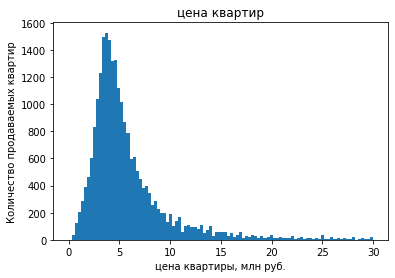

максимальная цена 763000000.0 наименьшая цена 430000.0 средняя цена 4642000.0


In [36]:
# Работаем с ценой объекта
plt.hist(data['last_price']/1000000, bins=100, range=(0,30))
plt.title('цена квартир')
plt.xlabel('цена квартиры, млн руб.')
plt.ylabel('Количество продаваемых квартир')
plt.show()
print('максимальная цена', data['last_price'].max(), 'наименьшая цена', data['last_price'].min(), 'средняя цена', data['last_price'].median())

Больше всего квартир продается по цене 3-4 млн рублей. Самая дорогая квартира стоила 763 млн, средняя цена 4,64 млн рубл. а цена в 12 190 - скорее всего статистическая ошибка.

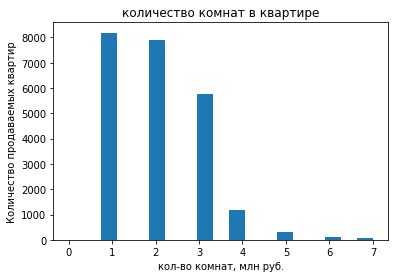

In [37]:
# Работаем с количеством комнат
plt.hist(data['rooms'], bins = data['rooms'].max(), range=(0,7))
plt.title('количество комнат в квартире')
plt.xlabel('кол-во комнат, млн руб.')
plt.ylabel('Количество продаваемых квартир')
plt.show()

больше всего продается 1-комнатных и 2-хкомнатных квартир.

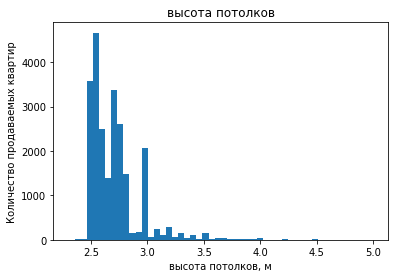

максимальная высота потолков 6.0 наименьшая высота потолков 2.0 средняя высота потолков 2.65


In [38]:
# Работаем с высотой потолков
plt.hist(data['ceiling_height'], bins=50,  range=(2.3,5))
plt.title('высота потолков')
plt.xlabel('высота потолков, м')
plt.ylabel('Количество продаваемых квартир')
plt.show()
print('максимальная высота потолков', data['ceiling_height'].max(), 'наименьшая высота потолков', data['ceiling_height'].min(), 'средняя высота потолков', data['ceiling_height'].median())

самая распространенная высота потолков 2.5-2.7 м. 

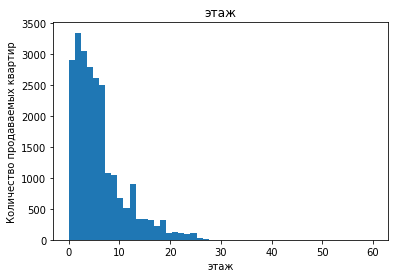

самый высокий этаж 33 средний этаж 4.0


In [39]:
# Этаж квартиры
plt.hist(data['floor'], bins=50,  range=(0,60))
plt.title('этаж')
plt.xlabel('этаж')
plt.ylabel('Количество продаваемых квартир')
plt.show()
print('самый высокий этаж', data['floor'].max(), 'средний этаж', data['floor'].median())

самый высокий этаж 33, средний этаж 4.0.

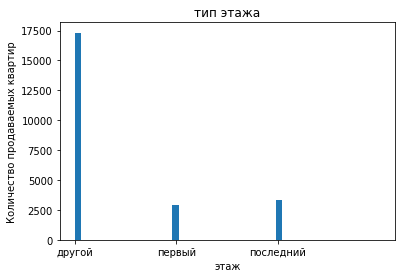

In [40]:
# Тип этажа квартиры
plt.hist(data['floor_category'], bins=50,  range=(0,3))
plt.title('тип этажа')
plt.xlabel('этаж')
plt.ylabel('Количество продаваемых квартир')
plt.show()

Чаще всего продаеются квартиры с типом "другой", то есть не первый и не последний.

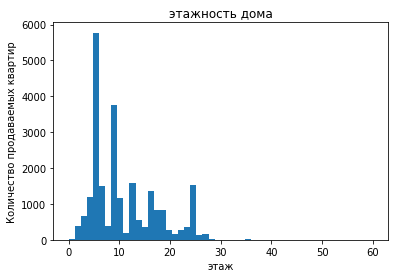

In [41]:
# Всего этажей в доме
plt.hist(data['floors_total'], bins=50,  range=(0,60))
plt.title('этажность дома')
plt.xlabel('этаж')
plt.ylabel('Количество продаваемых квартир')
plt.show()


Чаще всего продаются квартиры в 4-хэтажных домах.

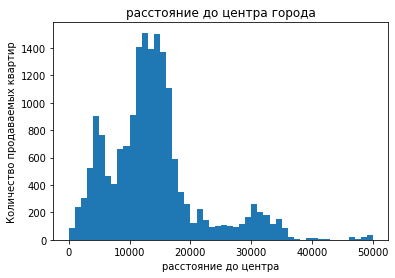

In [42]:
#расстояние до центра города в метрах
plt.hist(data['cityCenters_nearest'], bins=50,  range=(0,50000))
plt.title('расстояние до центра города')
plt.xlabel('расстояние до центра')
plt.ylabel('Количество продаваемых квартир')
plt.show()


Наибольшее количество квартир находится в 14-16 000 м от центра города

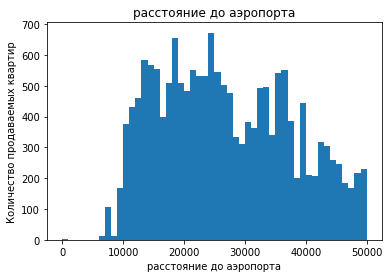

In [43]:
#расстояние до аэропорта
plt.hist(data['airports_nearest'], bins=50,  range=(0,50000))
plt.title('расстояние до аэропорта')
plt.xlabel('расстояние до аэропорта')
plt.ylabel('Количество продаваемых квартир')
plt.show()


чаще всего квартиры находятся на расстоянии от 10 000 до 38 000 м от ближайшего аэропорта.
скорее всего такой выброс по среднему из-за того, чтобы было очень много пропусков этих данных и мы их заполнили медианой

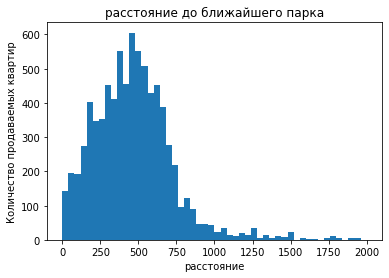

In [44]:
#расстояние до ближайшего парка
plt.hist(data.query('parks_nearest != 9999')['parks_nearest'], bins=50,  range=(0,2000))
plt.title('расстояние до ближайшего парка')
plt.xlabel('расстояние')
plt.ylabel('Количество продаваемых квартир')
plt.show()

расстояние до ближайшего парка от 150 до 650 м наиболее частое.

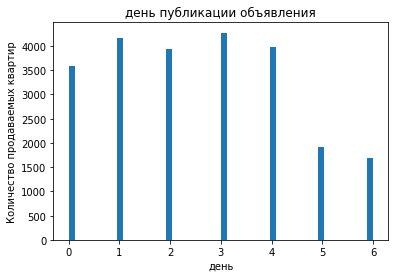

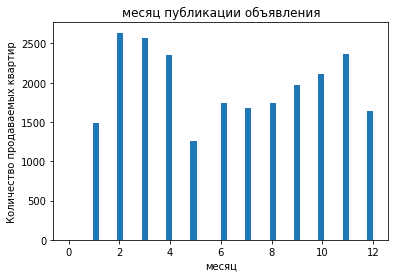

In [45]:
#день и месяц публикации объявления
plt.hist(data['weekday'], bins=50,  range=(0,6))
plt.title('день публикации объявления')
plt.xlabel('день')
plt.ylabel('Количество продаваемых квартир')
plt.show()
plt.hist(data['month'], bins=50,  range=(0,12))
plt.title('месяц публикации объявления')
plt.xlabel('месяц')
plt.ylabel('Количество продаваемых квартир')
plt.show()

в выходные меньше всего публикуется объявлений, а также в месяцы с большим количеством праздников: декабрь, январь и май.

In [46]:
# Сколько дней было размещено объявление
data1 = data.query('days_exposition != 9999')

Убрали из анализа объявления с маркером 9999 - это те квартиры, которые еще не проданы

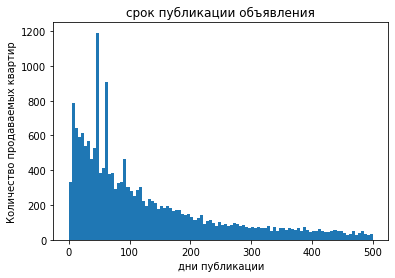

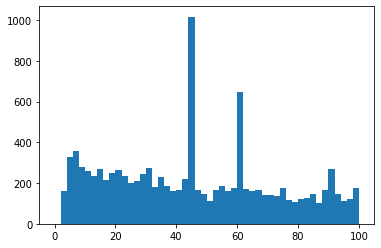

count    20381.000000
mean       180.758893
std        219.762914
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [47]:
plt.hist(data1['days_exposition'], bins=100, range=(0,500))
plt.title('срок публикации объявления')
plt.xlabel('дни публикации')
plt.ylabel('Количество продаваемых квартир')
plt.show()
plt.hist(data1['days_exposition'], bins=50, range=(0,100))
plt.show()
data1['days_exposition'].describe()

Среднее время продажи 180 дней, а медианной 95. есть рекордно-короткий срок продажи в 1 день, а максимальный в 1580 дней. Вполне, можем считать быстрой продажей - за срок менее 45 дней, а слишком долгими - свыше 231 дня.

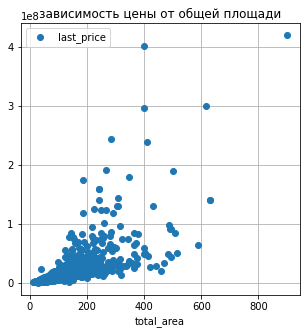

Корреляция цены и площади: 
             last_price  total_area
last_price    1.000000    0.720817
total_area    0.720817    1.000000 



In [48]:
## Выясним какие факторы(общая площадь, жилая площадь,площади кухни, количество комнат, 
# этажа, на котором расположена квартира (первый, последний, другой), 
# дата размещения (день недели, месяц, год)) больше всего влияют на стоимость объекта.

# Зависимость цены от общей площади
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.title('зависимость цены от общей площади')
plt.show()
print('Корреляция цены и площади:','\n', data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

Зависимость цены квартиры от площади ярко выражена и отлично прослеживается: чем больше площадь, тем больше цена квартиры. коэффициент корреляция высокий - 0.72.

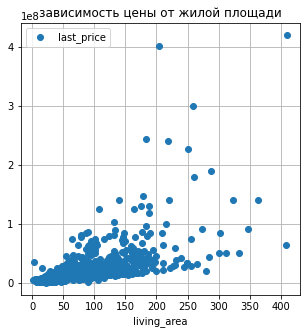

Корреляция цены и площади: 
              last_price  living_area
last_price     1.000000     0.620788
living_area    0.620788     1.000000 



In [49]:
# зависимость цены от жилой площади
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.title('зависимость цены от жилой площади')
plt.show()
print('Корреляция цены и площади:','\n', data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')

Корреляция высокая - 0.62, цены квартиры возрастает при увеличении жилой площади квартиры, но это и очевидно, что при увеличении общей площади квартиры, как правило, увеличивается и ее жилая площадь.

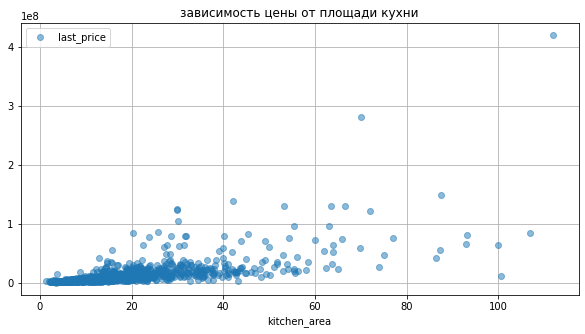

Корреляция цены и площади: 
               kitchen_area  last_price
kitchen_area      1.000000    0.366128
last_price        0.366128    1.000000 



In [50]:
# зависимость цены от площади кухни
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(10, 5), alpha=0.5)
plt.title('зависимость цены от площади кухни')
plt.show()
print('Корреляция цены и площади:','\n', data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

небольшая зависимость есть, плотности в области самых распространенных площадей кухни говорит, что при увеличении площади кухни увеличивается и общая цена квартиры


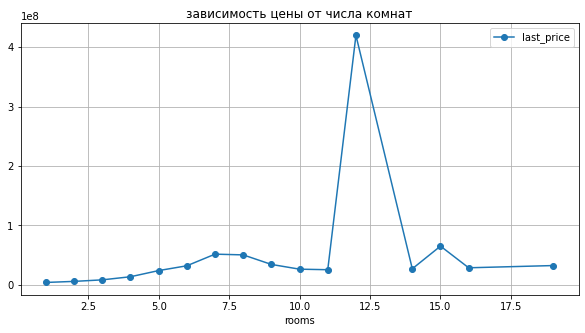

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.441874
rooms         0.441874  1.000000 



In [51]:
# Зависимость цены от числа комнат
data.query('rooms > 0').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(10, 5))
plt.title('зависимость цены от числа комнат')
plt.show()

print('Корреляция цены и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

Зависимость цены от количества комнат тоже есть, но не такая сильная, как зависимость от площади.
По всей видимости, так как есть малокомнатные квартиры, но комнаты сами большие по площади, 
а встречаются и квартиры с большим количеством комнат, но с маленькой площадью этих комнат. 
Зависимость хорошо прослеживается вплоть до квартир с 7ью комнатами. Далее, зависимость не очевидна. 
по всей видимости, из-за не очень большого числа многокомнатных квартир и устоявшейся практики их продажи.

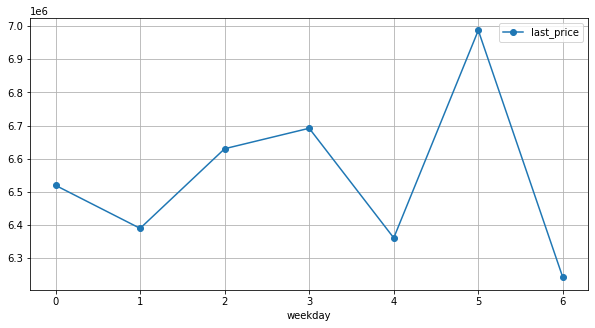

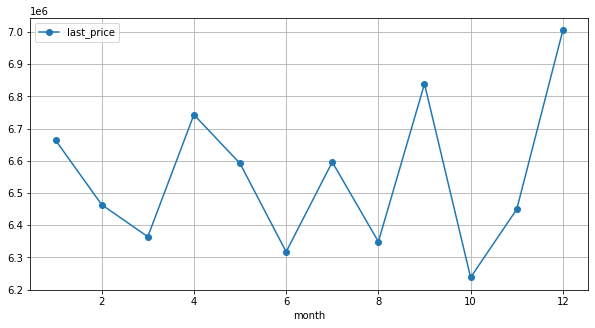

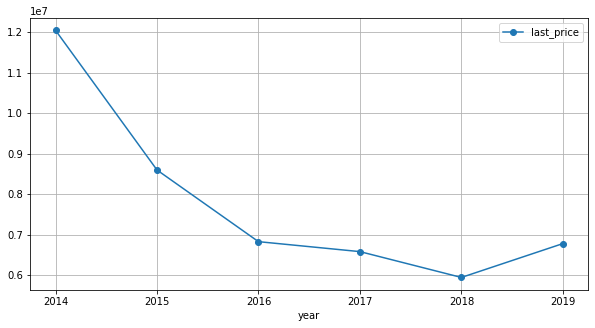

In [52]:
# Зависимость цены от даты размещения объекта на продажу
for x in ['weekday', 'month', 'year']:
    data.pivot_table(index=x, values='last_price').plot(grid=True, style='o-', figsize=(10, 5))
    plt.show()

Чаще всего публикуются более дорогие объекты в субботу. А воскресенье, наоборот, самые дешевые. Но это скорее всего связано с тем, что в воскресенье и публикуется наименьшее число объявлений.

Самые дорогие объекты выставлялись на продажу в апреле, сентябре и декабре.

цены на квартиры в 2014 году были гораздо выше, чем в последующие. и после минимальных цен в 2018, в 2019 опять прослеживается их подъем.

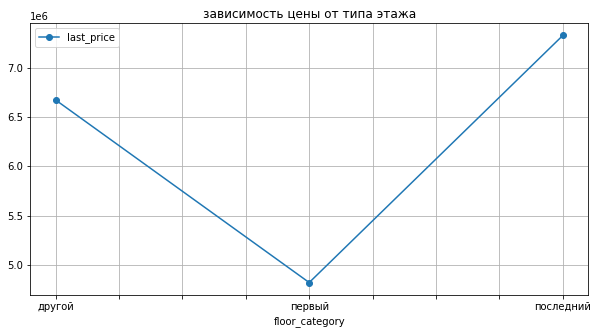

Корреляция цены и этажа: 
             last_price
last_price         1.0 



In [53]:
# Зависимость цены от типа этажа
data.pivot_table(index='floor_category', values='last_price').plot(grid=True, style='o-', figsize=(10, 5))
plt.title('зависимость цены от типа этажа')
plt.show()
print('Корреляция цены и этажа:','\n', data.pivot_table(index='floor', values=['floor_category', 'last_price']).corr(),'\n')

Первый этаж не сильно любят покупатели, он значительно дешевле остальных. последний чуть дороже "других" этажей


In [54]:
# посчитаем среднюю цену квадратного метра в населенных пунктах с наибольшим числом объявлений

locality10 = data.pivot_table(index='locality_name',values='price_m',aggfunc=('count','median'))
locality10.sort_values(by='count',ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,15641,104770.266315
поселок Мурино,552,86059.293995
поселок Шушары,439,76829.268293
Всеволожск,398,65789.473684
Пушкин,369,100000.000000
Колпино,338,74723.748474
поселок Парголово,327,91642.857143
Гатчина,307,67796.610169
деревня Кудрово,299,91860.465116


Самая высокая цена за квадратный метр в Санкт-Петербурге - 104 770 руб., самая низкая в отобранной десятке в Выборге - 58 158 руб. за кв.м.

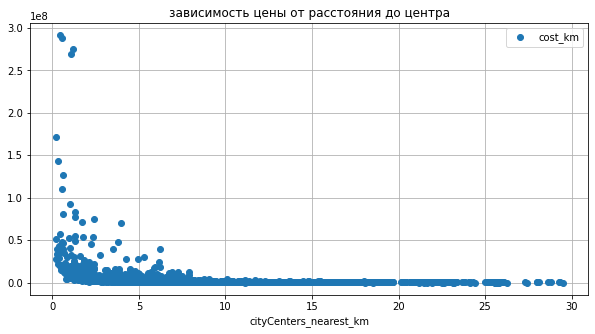

Корреляция цены и числа комнат: 

                        cityCenters_nearest_km  cost_km
cityCenters_nearest_km                 1.00000 -0.64724
cost_km                               -0.64724  1.00000 



In [55]:
# Оценим стоимость объектов в Санкт-Петербурге в зависимости от расстояния от центра города cityCenters_nearest_km
data['cost_km'] = data['last_price']/data['cityCenters_nearest_km']
spb_region=data.query('locality_name=="Санкт-Петербург"')
#print(spb_region.head())

spb_region.pivot_table(index='cityCenters_nearest_km', values='cost_km').plot(grid=True, style='o', figsize=(10, 5))
plt.title('зависимость цены от расстояния до центра')
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(spb_region.query('cityCenters_nearest_km > 0').pivot_table(index='floor', values=['cityCenters_nearest_km', 'cost_km']).corr(),'\n')

Очевидно, что квартиры ближе к центру стоят дороже. Коэффициент корреляции - 0.65 подтверждает довольно сильную зависимость цены от удаленности от центра. Однако, после 6 км это уже не так ярковыраженно и понятно, что этот фактор становится не решающим для определения стоимости объекта.

### Общий вывод

ОСновные факторы, влияющие на стоимость объекта недвижимости:
    * общая площадь квартиры, а также ее жилая часть. Но количество комнат не сильно влияет на цену 
    объекта. Существуют дорогие квартиры с малым числом просторных комнат, но с большой общей площадью.
    * размер кухни также оказывает влияние на стоимость.
    * локация играет существенную роль в формировании цены квартиры: цены в Санкт-Петербурге дороже, чем в Выборге.
    * а также влияет удаленность от центра в гор. Санкт-Петербурге при нахождении недвижимости в радиусе 8 км от центра города.
    * первый этаж - снижает стоимость квариты.

Самые ликвидные объекты: 1-2х-комнатные квартиры, с общей площадью до 50 кв.м, стоимостью до 4 млн, 
не на первом этаже в 4х-этажном доме.

Чаще всего квартиры продаются за 95 дней, но есть и быстрые продажи. А также и очень долгие - более 231 дней.
Экономический кризис 2014 года сильно повлиял на стоимость недвижимости - она сильно упала и снижалась вплоть до 2018 года.

Активность продавцов по размещению новых объектов недвижимости зависит от дней недели - в выходные публикуется мало объявлений.
А также снижается активность и в месяцы, когда много праздничных дней - люди заняты не продажами квартир, а праздниками.

Но, как ни странно, квартиры опубликованные в субботу и в декабре, в среднем, продавались по более высоким ценам.
    
    